In [1]:
import numpy as np
import pandas as pd
import sounddevice as sd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.fftpack import fft

import os
import time

In [3]:
path_voice_samples = "ismael_vocal/"

In [6]:
files = os.listdir(path_voice_samples)

In [15]:

range(0,len(files),1)

range(0, 30)

In [9]:

file_sel = files[1]
df_sample = pd.read_csv("ismael_vocal/" + file_sel)

print(file_sel)
sd.play(df_sample['signal'].to_list())

tetst_1_file_10.csv


In [19]:
for i in range(0,len(files),1):
    file_sel = files[i]
    df_sample = pd.read_csv("ismael_vocal/" + file_sel)

    print(file_sel)
    sd.play(df_sample['signal'].to_list())
    time.sleep(2)
    

tetst_1_file_1.csv
tetst_1_file_10.csv
tetst_1_file_11.csv
tetst_1_file_12.csv
tetst_1_file_13.csv
tetst_1_file_14.csv
tetst_1_file_15.csv
tetst_1_file_16.csv
tetst_1_file_17.csv
tetst_1_file_18.csv
tetst_1_file_19.csv
tetst_1_file_2.csv
tetst_1_file_20.csv
tetst_1_file_21.csv
tetst_1_file_22.csv
tetst_1_file_23.csv
tetst_1_file_24.csv
tetst_1_file_25.csv
tetst_1_file_26.csv
tetst_1_file_27.csv
tetst_1_file_28.csv
tetst_1_file_29.csv
tetst_1_file_3.csv
tetst_1_file_30.csv
tetst_1_file_4.csv
tetst_1_file_5.csv
tetst_1_file_6.csv
tetst_1_file_7.csv
tetst_1_file_8.csv
tetst_1_file_9.csv


c:\Users\rigle\.conda\envs\ml_9\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


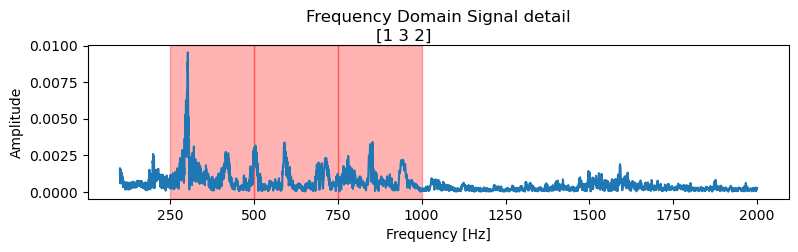

[(250, 500), (750, 1000), (500, 750)]

In [47]:

def fft_from_signal(audio_signal, sample_rate=44100, f_max=2000, band_width=250, plot = True):
    # FFT calculation
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    positive_magnitudes = yf[:N//2] 
    xf = np.fft.fftfreq(N, T)[:N//2]
    yf = 2.0/N * np.abs(yf[:N//2])

     # Filter to keep only frequencies up to f_max
    mask = xf <= f_max
    xf = xf[mask]
    yf = yf[mask]
    positive_magnitudes = positive_magnitudes[mask]

    # Create a DataFrame for frequency and PSD
    df_f = pd.DataFrame({'f': xf, 'psd': yf})


    # Calculate the number of bands
    num_bands = int(f_max // band_width) + 1

    # Group the frequencies into bands
    df_f['band'] = (df_f['f'] // band_width).astype(int)

        # Sum the magnitudes within each band
    band_magnitudes = np.zeros(num_bands)
    for i in range(num_bands):
        band_start_freq = i * band_width
        band_end_freq = (i + 1) * band_width
        band_mask = (xf >= band_start_freq) & (xf < band_end_freq)
        band_magnitudes[i] = np.sum(abs(positive_magnitudes[band_mask]))

    # Identify the three most dominant bands
    dominant_bands_indices = np.argsort(band_magnitudes)[-3:][::-1]
    dominant_bands = [(i * band_width, (i + 1) * band_width) for i in dominant_bands_indices]

    if plot == True:
        plt.figure(figsize=(8, 3))
        sns.lineplot(data = df_f[ (df_f.f > 100) &(df_f.f < 2000)], x = 'f', y= 'psd')
        #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
        for band in dominant_bands:
            plt.axvspan(band[0], band[1], color='red', alpha=0.3, label=f'{band[0]} Hz - {band[1]} Hz')
        plt.title("Frequency Domain Signal detail", y = 1.1)
        plt.suptitle(dominant_bands_indices, y=0.76)
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Amplitude")

        # Show plots
        plt.tight_layout()
        plt.show()

    

    return(dominant_bands, dominant_bands_indices)


dominant_bands,dominant_bands_indices = fft_from_signal(df_sample['signal'].to_list())
dominant_bands

In [24]:

pd.DataFrame(dominant_bands_indices, columns=['Values'])

,Values
0,1
1,3
2,2


In [27]:
df_result

,dominant_bands_indices,dominant_bands,file_name
0,1,"(250, 500)",tetst_1_file_1.csv
1,0,"(0, 250)",tetst_1_file_1.csv
2,2,"(500, 750)",tetst_1_file_1.csv


In [41]:
band_width_sel = 20

ii = 0
for i in range(0,len(files),1):
    file_sel = files[i]
    df_sample = pd.read_csv("ismael_vocal/" + file_sel)

    #print(file_sel)
    #sd.play(df_sample['signal'].to_list())
    dominant_bands, dominant_bands_indices = fft_from_signal(df_sample['signal'].to_list(), 
                                                             band_width = band_width_sel,
                                                             plot = False)

    df_result_part = pd.DataFrame(dominant_bands_indices, columns=['dominant_bands_indices'])
    df_result_part['dominant_bands'] = dominant_bands
    df_result_part['file_name'] = file_sel
    if ii == 0:
        df_result = df_result_part.copy()
    else:
        df_result = pd.concat([df_result,df_result_part])
        
    ii+=1

df_result.reset_index()

,index,dominant_bands_indices,dominant_bands,file_name
0,0,14,"(280, 300)",tetst_1_file_1.csv
1,1,13,"(260, 280)",tetst_1_file_1.csv
2,2,0,"(0, 20)",tetst_1_file_1.csv
3,0,16,"(320, 340)",tetst_1_file_10.csv
4,1,40,"(800, 820)",tetst_1_file_10.csv
...,...,...,...,...
85,1,26,"(520, 540)",tetst_1_file_8.csv
86,2,13,"(260, 280)",tetst_1_file_8.csv
87,0,15,"(300, 320)",tetst_1_file_9.csv
88,1,14,"(280, 300)",tetst_1_file_9.csv


<AxesSubplot: xlabel='dominant_bands_indices', ylabel='Count'>

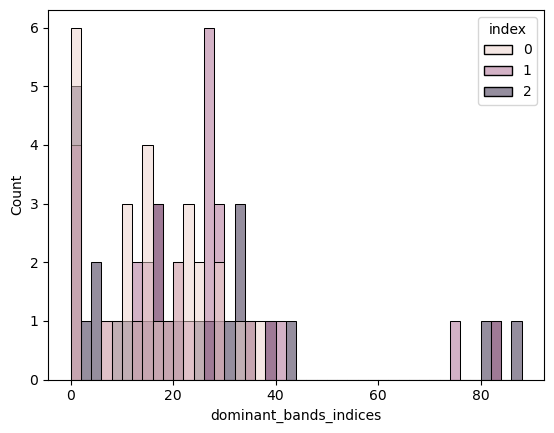

In [44]:
sns.histplot(data= df_result.reset_index(), x= 'dominant_bands_indices', binwidth=2, hue = 'index')

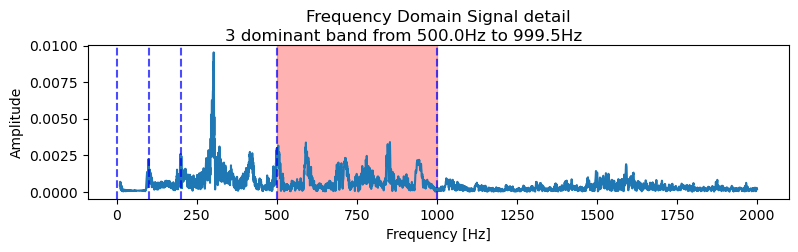

Dominant frequency band index: 3
PSD sum for each band: band
0    0.033734
1    0.119244
2    0.674956
3    0.810546
4    0.604339
Name: psd, dtype: float64


In [120]:
import numpy as np
import pandas as pd
from scipy.fft import fft

def fft_from_signal_dominant_band(audio_signal, sample_rate=44100, f_min = 10,f_max = 2000, freq_bands=[0, 100, 200, 500, 1000], plot = True):
    # FFT calculation
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    yf = 2.0/N * np.abs(yf[:N//2])

    # Filter to keep only frequencies up to f_max
    mask = xf <= f_max
    xf = xf[mask]
    yf = yf[mask]

    # Filter to keep only frequencies over f_min
    mask = xf >= f_min
    xf = xf[mask]
    yf = yf[mask]

    # Create a DataFrame for frequency and PSD
    df_f = pd.DataFrame({'f': xf, 'psd': yf})

    # Determine the frequency band for each frequency
    df_f['band'] = np.digitize(df_f['f'], freq_bands) - 1

    # Sum PSD values within each band
    band_psd_sum = df_f.groupby('band')['psd'].sum()
    
    # Find the index of the dominant frequency band
    dominant_band_index = band_psd_sum.idxmax()

    dominant_band_start = df_f[df_f.band == dominant_band_index].f.min()
    dominant_band_end = df_f[df_f.band == dominant_band_index].f.max()

    if plot == True:
        plt.figure(figsize=(8, 3))
        sns.lineplot(data = df_f, x = 'f', y= 'psd')
        #plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
        
        plt.axvspan(dominant_band_start, dominant_band_end, color='red', alpha=0.3)

        # Plot vertical lines at the freq_bands
        for band in freq_bands:
            plt.axvline(x=band, color='blue', linestyle='--', alpha=0.7)
        plt.title("Frequency Domain Signal detail", y = 1.1)
        plt.suptitle(str(dominant_band_index) +" dominant band from " + str(dominant_band_start) +"Hz to "+ str(dominant_band_end) + "Hz", y=0.76)
        plt.xlabel("Frequency [Hz]")
        plt.ylabel("Amplitude")

        # Show plots
        plt.tight_layout()
        plt.show()

    return dominant_band_index, band_psd_sum

# Example usage

dominant_band_index, band_psd_sum = fft_from_signal_dominant_band(df_sample['signal'].to_list())
print(f"Dominant frequency band index: {dominant_band_index}")
print("PSD sum for each band:", band_psd_sum)


In [112]:
dominant_bands

2

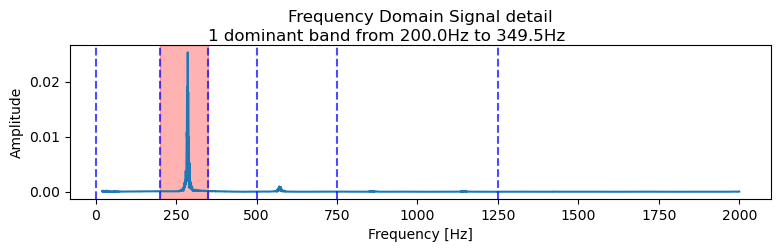

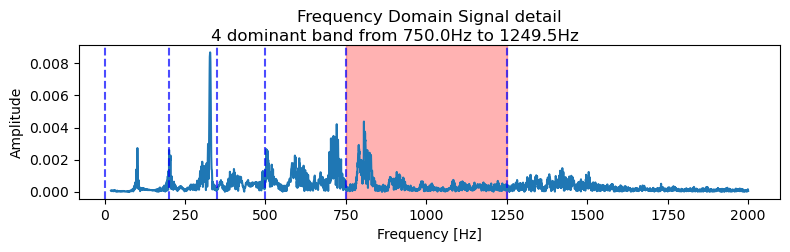

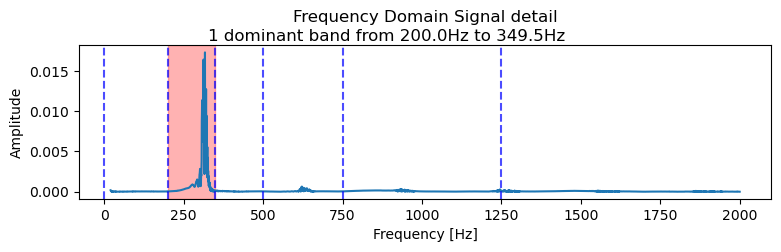

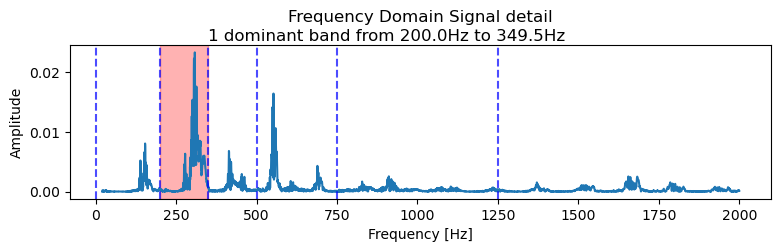

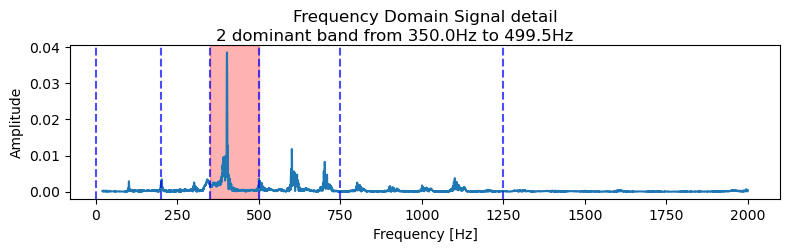

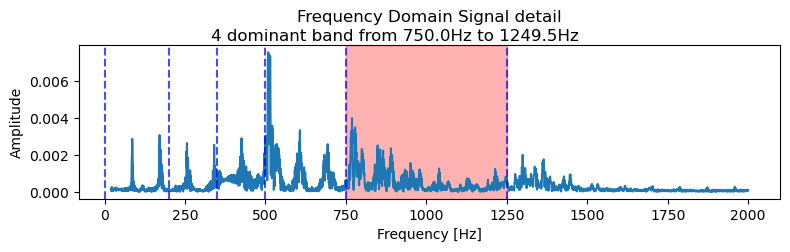

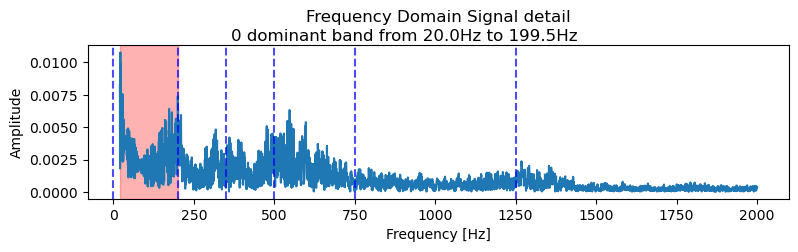

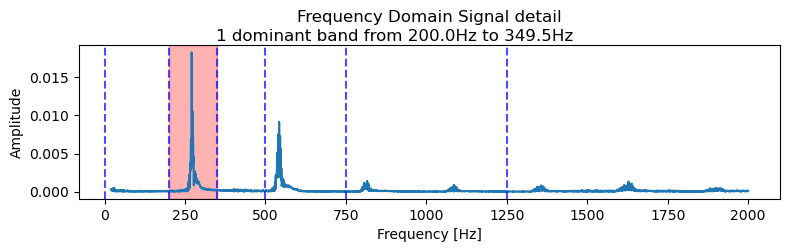

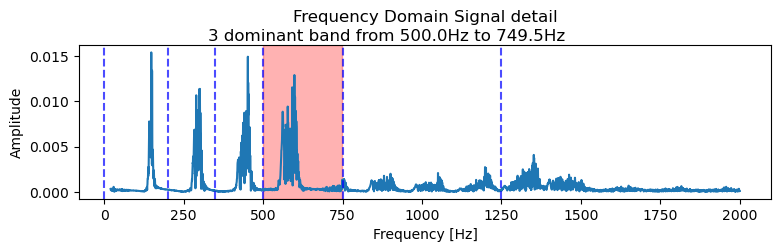

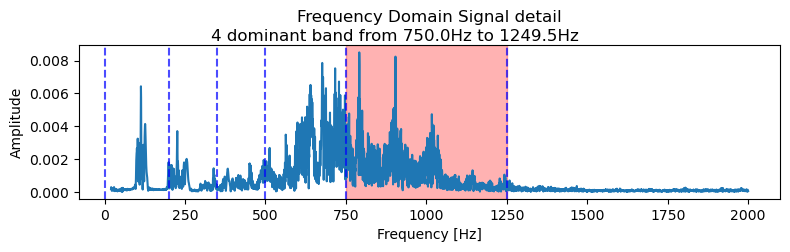

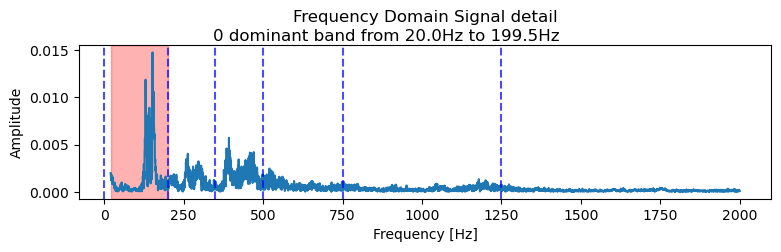

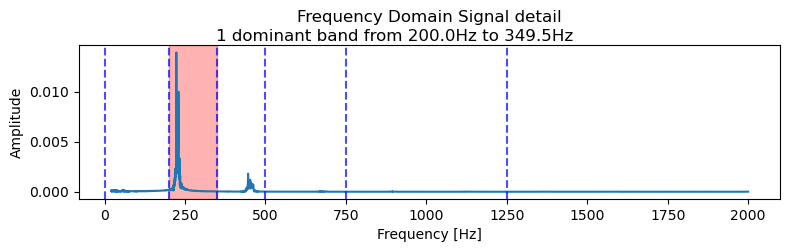

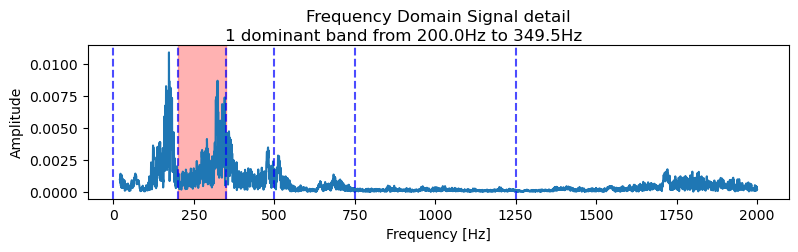

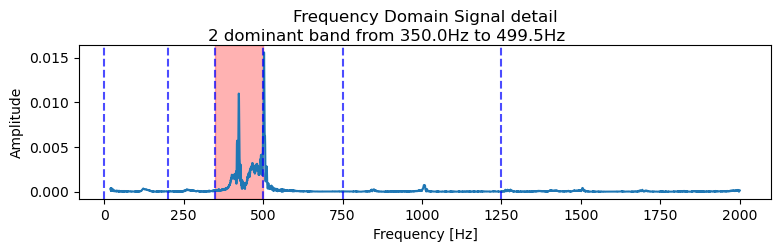

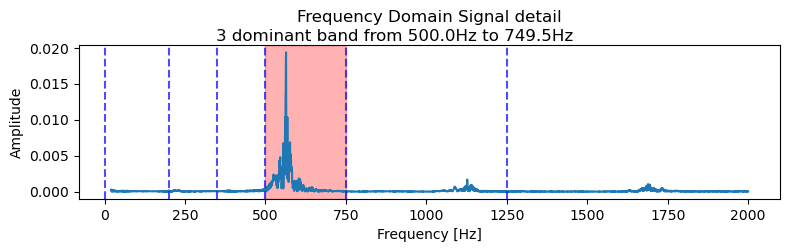

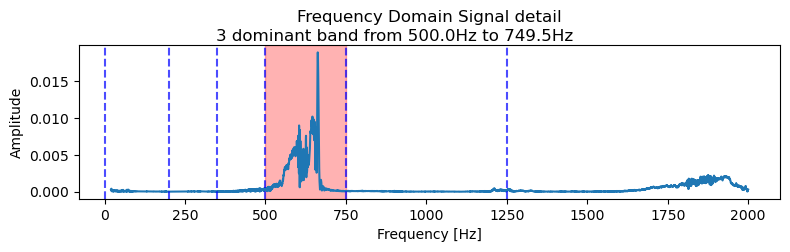

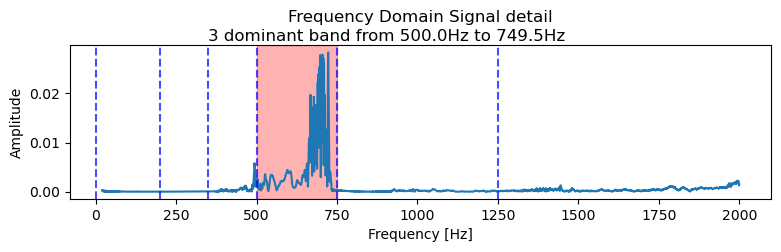

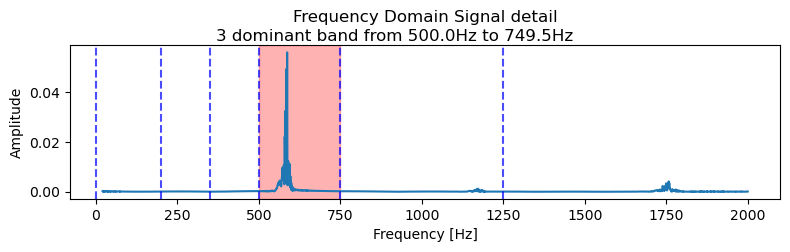

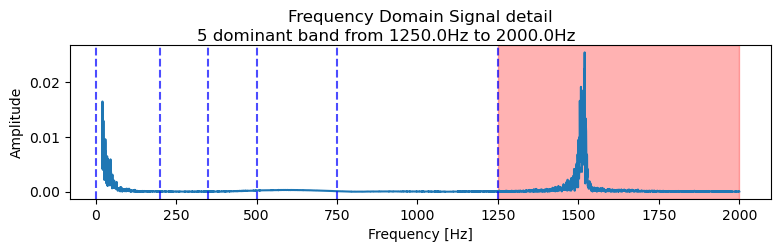

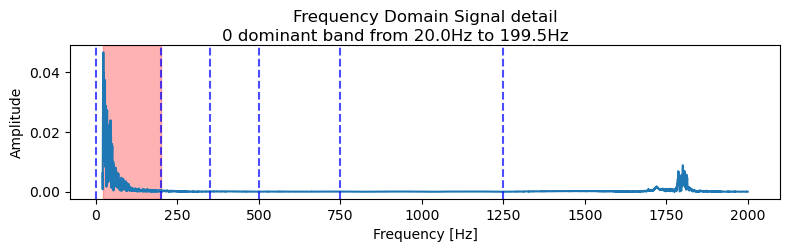

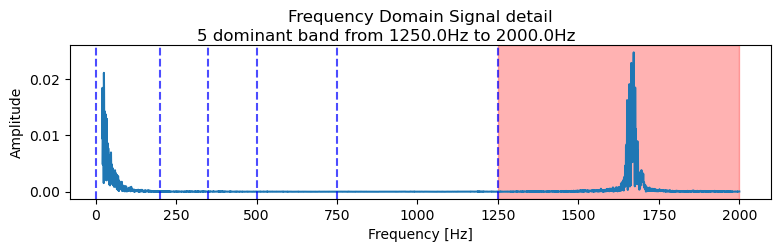

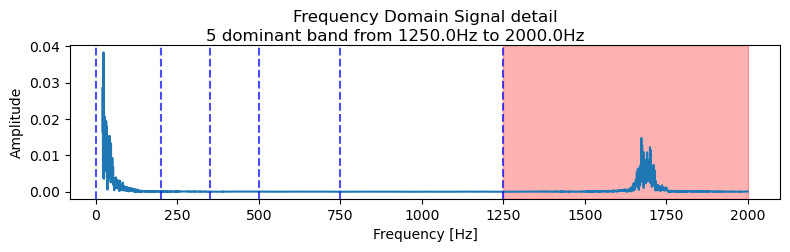

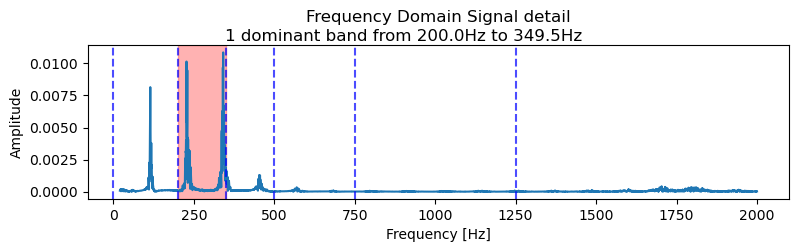

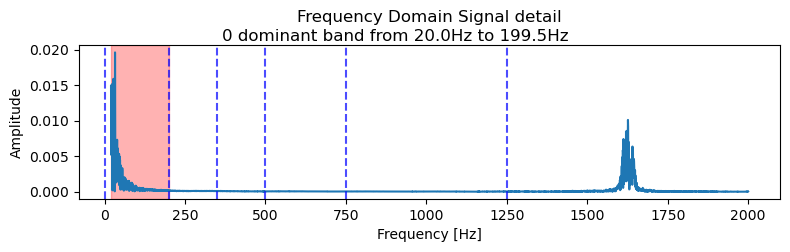

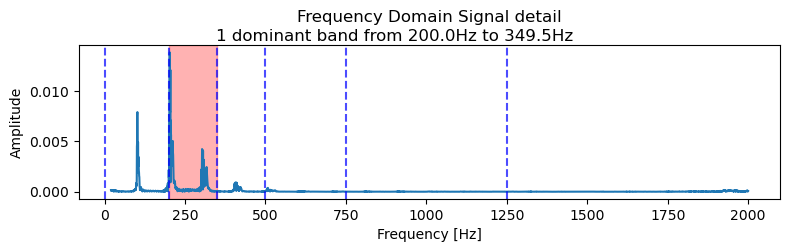

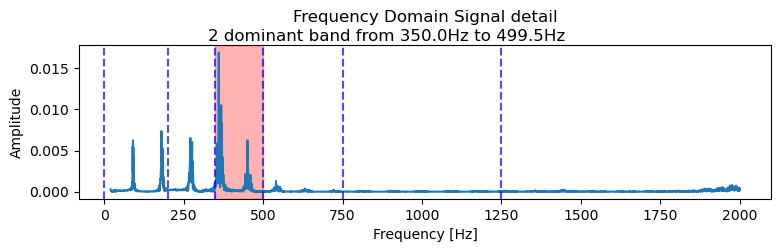

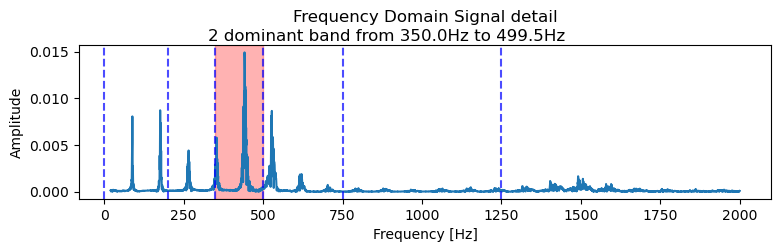

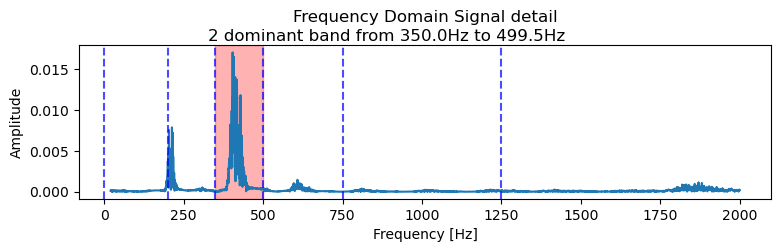

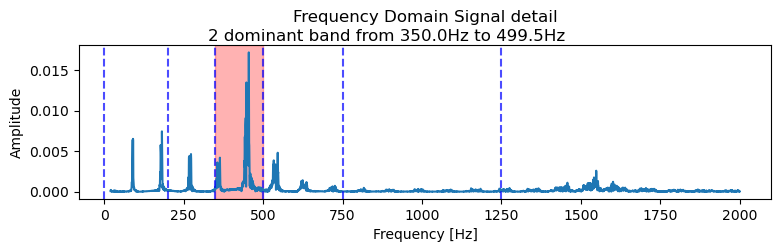

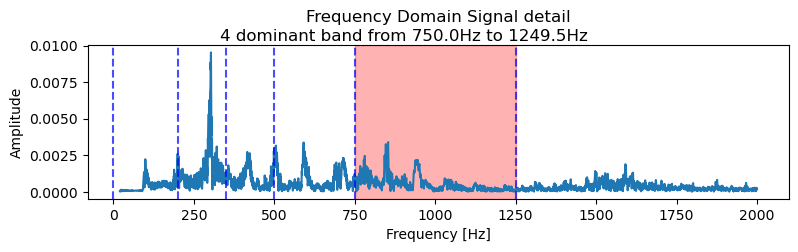

<AxesSubplot: xlabel='dominant_bands', ylabel='Count'>

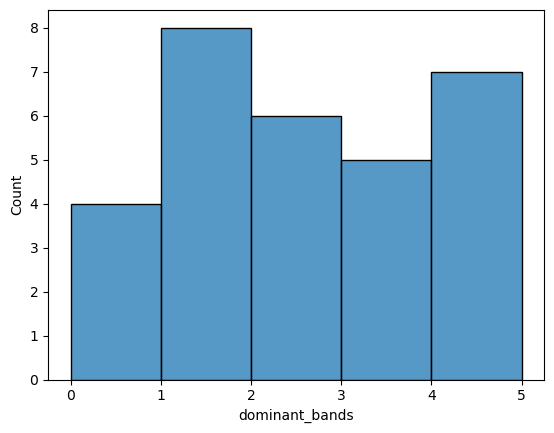

In [133]:
freq_bands_sel =[0, 200, 350, 500,750, 1250]
f_max_sel = 2000
f_min_sel = 20

ii = 0
for i in range(0,len(files),1):
    file_sel = files[i]
    df_sample = pd.read_csv("ismael_vocal/" + file_sel)

    #print(file_sel)
    sd.play(df_sample['signal'].to_list())
    time.sleep(2)
    dominant_bands, dominant_bands_indices = fft_from_signal_dominant_band(df_sample['signal'].to_list(), 
                                                             freq_bands = freq_bands_sel,
                                                             f_max= f_max_sel,
                                                             f_min = f_min_sel,
                                                             plot = True)

    df_result_part = pd.DataFrame([dominant_bands], columns=['dominant_bands'])
    df_result_part['dominant_bands'] = dominant_bands
    df_result_part['file_name'] = file_sel
    if ii == 0:
        df_result = df_result_part.copy()
    else:
        df_result = pd.concat([df_result,df_result_part])
        
    ii+=1

df_result = df_result

sns.histplot(data = df_result, x = "dominant_bands", binwidth=1)

In [134]:
df_result.value_counts('dominant_bands')

dominant_bands
1    8
2    6
3    5
0    4
4    4
5    3
dtype: int64